In [ ]:
!pip install fiftyone

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.1/677.1 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.5/88.5 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py)

In [ ]:
!pip install tensorflow torch torchvision umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.4 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=3b821376e04bf44836ad94d8f98d8ebd38c2ca8644747722861ab4b35b971874
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import pandas as pd
import csv
import sys
import fiftyone as fo
import fiftyone.zoo as foz
import torchvision.models.detection as models
import torch
from PIL import Image
from torchvision.transforms import functional as func
from fiftyone import ViewField as F
import collections
import matplotlib.patches as patches


Migrating database to v0.23.2


INFO:fiftyone.migrations.runner:Migrating database to v0.23.2


In [ ]:
# Load the COCO dataset
coco_dataset= foz.load_zoo_dataset("coco-2017", split="validation", dataset_dir="coco-analysis")

INFO:fiftyone.zoo.datasets:Downloading split 'validation' to 'coco-analysis/validation' if necessary


INFO:fiftyone.utils.coco:Downloading annotations to 'coco-analysis/tmp-download/annotations_trainval2017.zip'


 100% |██████|    1.9Gb/1.9Gb [5.9s elapsed, 0s remaining, 363.5Mb/s]       


INFO:eta.core.utils: 100% |██████|    1.9Gb/1.9Gb [5.9s elapsed, 0s remaining, 363.5Mb/s]       


Extracting annotations to 'coco-analysis/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Extracting annotations to 'coco-analysis/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Downloading images to 'coco-analysis/tmp-download/val2017.zip'


 100% |██████|    6.1Gb/6.1Gb [17.8s elapsed, 0s remaining, 344.2Mb/s]      


INFO:eta.core.utils: 100% |██████|    6.1Gb/6.1Gb [17.8s elapsed, 0s remaining, 344.2Mb/s]      


Extracting images to 'coco-analysis/validation/data'


INFO:fiftyone.utils.coco:Extracting images to 'coco-analysis/validation/data'


Writing annotations to 'coco-analysis/validation/labels.json'


INFO:fiftyone.utils.coco:Writing annotations to 'coco-analysis/validation/labels.json'


Dataset info written to 'coco-analysis/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to 'coco-analysis/info.json'


Loading 'coco-2017' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'validation'


 100% |███████████████| 5000/5000 [30.7s elapsed, 0s remaining, 165.7 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [30.7s elapsed, 0s remaining, 165.7 samples/s]      


Dataset 'coco-2017-validation' created


INFO:fiftyone.zoo.datasets:Dataset 'coco-2017-validation' created


In [ ]:
print(coco_dataset)

Name:        coco-2017-validation
Media type:  image
Num samples: 5000
Persistent:  False
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)


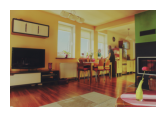

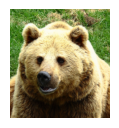

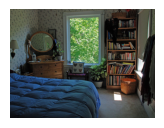

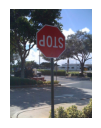

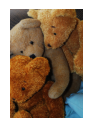

In [ ]:
#some photos from dataset
def print_photos(dataset):
  for sample in dataset[:5]:

    # Access image path
    image_path = sample.filepath

    # Display the image using PIL and matplotlib
    img = Image.open(image_path)
    plt.subplot(3, 3, 1)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

print_photos(coco_dataset)

In [ ]:
# Launch the FiftyOne App to explore the dataset
session = fo.launch_app(coco_dataset)

# prints of some ground truth

In [ ]:
def print_ground_truth(dataset):
  # Iterate over the samples
  for sample in dataset[:5]:  # Print ground truth for the first 5 samples
    print("Image: ", sample.filepath)

    # Access ground truth annotations
    ground_truth = sample.ground_truth

    # Iterate over the detections in the ground truth
    for i, detection in enumerate(ground_truth.detections):
        print(f"  Annotation {i + 1}:")
        print(f"    Class: {detection.label}, Bounding Box: {detection.bounding_box}")

    print("\n")

print_ground_truth(coco_dataset)

Image:  /content/coco-analysis/validation/data/000000000139.jpg
  Annotation 1:
    Class: potted plant, Bounding Box: [0.37028125, 0.3345305164319249, 0.038593749999999996, 0.16314553990610328]
  Annotation 2:
    Class: tv, Bounding Box: [0.010984375000000001, 0.39380281690140845, 0.23331249999999998, 0.22269953051643193]
  Annotation 3:
    Class: tv, Bounding Box: [0.8706406250000001, 0.491056338028169, 0.127109375, 0.18481220657276995]
  Annotation 4:
    Class: chair, Bounding Box: [0.56090625, 0.5118544600938968, 0.0875, 0.24138497652582158]
  Annotation 5:
    Class: chair, Bounding Box: [0.454203125, 0.5117370892018779, 0.096609375, 0.2311737089201878]
  Annotation 6:
    Class: chair, Bounding Box: [0.645625, 0.5234976525821596, 0.047140625000000005, 0.19098591549295774]
  Annotation 7:
    Class: chair, Bounding Box: [0.4959375, 0.5146478873239437, 0.03371875, 0.02720657276995305]
  Annotation 8:
    Class: person, Bounding Box: [0.645, 0.3699765258215963, 0.082890625, 0.323

640
426


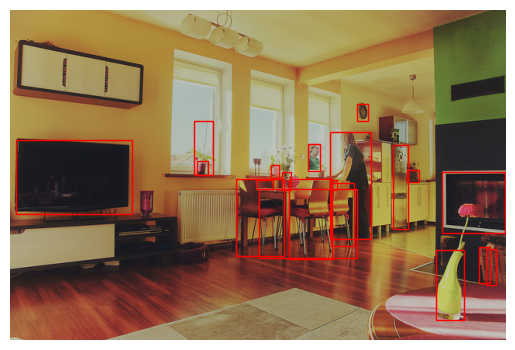

586
640


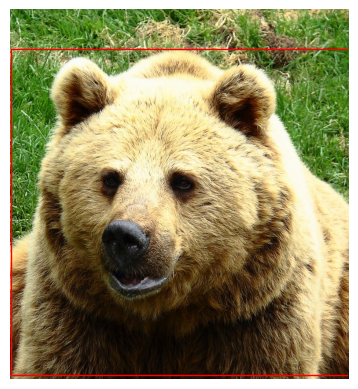

640
483


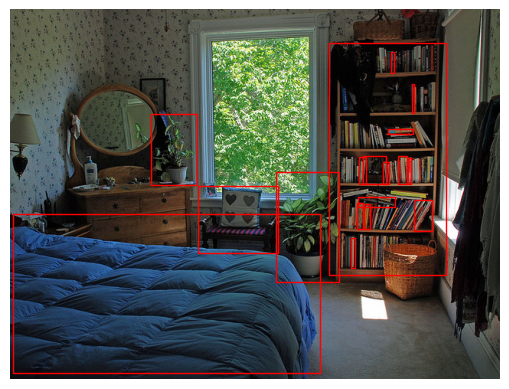

375
500


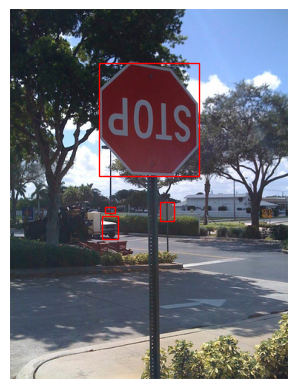

428
640


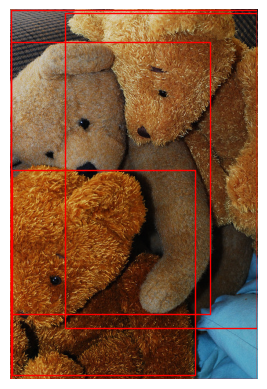

In [ ]:
def visualize_ground_truth(dataset):
  # Assuming you have already loaded or defined your coco_dataset

  for sample in dataset[:5]:
    # Load the image
    img = Image.open(sample.filepath)
    width, height = img.size  # Get the width and height of the image
    print(width)
    print(height)

    # Access ground truth annotations
    ground_truth = sample.get_field("ground_truth")

    # Create a figure and axis
    fig, ax = plt.subplots(1)
    ax.imshow(img)

    # Iterate over the detections in the ground truth
    for detection in ground_truth.detections:
        # Extract bounding box coordinates (assuming relative coordinates)
        bbox = detection.bounding_box
        xmin, ymin, xmax, ymax = bbox

        # Scale the coordinates to image dimensions
        xmin *= width
        xmax *= width
        ymin *= height
        ymax *= height

        # Create a Rectangle patch
        rect = patches.Rectangle(
            (xmin, ymin),
            xmax,
            ymax,
            linewidth=1,
            edgecolor="r",
            facecolor="none",  # No fill color
        )

        # Add the patch to the Axes
        ax.add_patch(rect)

    plt.axis("off")
    plt.show()

visualize_ground_truth(coco_dataset)

In [ ]:
def nonNumeric_classes(dataset):
  active_classes = []
  for c in dataset.default_classes:
    if not c.isdigit():
      active_classes.append(c)
  return active_classes

coco_nonNumeric_classes = nonNumeric_classes(coco_dataset)

**VOC** **part**

In [ ]:
voc_dataset = foz.load_zoo_dataset("voc-2012", split="validation", dataset_name="voc-analysis",)

INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/voc-2012/validation'


100%|██████████| 1999639040/1999639040 [01:28<00:00, 22565978.50it/s]


Extracting /root/fiftyone/voc-2012/tmp-download/VOCtrainval_11-May-2012.tar to /root/fiftyone/voc-2012/tmp-download
 100% |███████████████| 5823/5823 [1.2m elapsed, 0s remaining, 59.8 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5823/5823 [1.2m elapsed, 0s remaining, 59.8 samples/s]      


Dataset info written to '/root/fiftyone/voc-2012/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/voc-2012/info.json'


Loading 'voc-2012' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'voc-2012' split 'validation'


 100% |███████████████| 5823/5823 [17.0s elapsed, 0s remaining, 335.5 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5823/5823 [17.0s elapsed, 0s remaining, 335.5 samples/s]      


Dataset 'voc-analysis' created


INFO:fiftyone.zoo.datasets:Dataset 'voc-analysis' created


Name:        voc-analysis
Media type:  image
Num samples: 5823
Persistent:  False
Tags:        []
Sample fields:
    id:                              fiftyone.core.fields.ObjectIdField
    filepath:                        fiftyone.core.fields.StringField
    tags:                            fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:                        fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth:                    fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    voc_predictions_of_ssd300_vgg16: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    eval_tp:                         fiftyone.core.fields.IntField
    eval_fp:                         fiftyone.core.fields.IntField
    eval_fn:                         fiftyone.core.fields.IntField


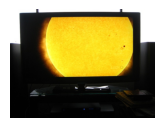

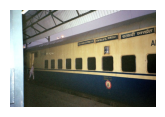

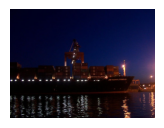

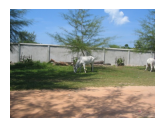

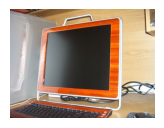

In [ ]:
print(voc_dataset)
print_photos(voc_dataset)

In [ ]:
# Launch the FiftyOne App to explore the dataset
session = fo.launch_app(voc_dataset)

In [ ]:
print_ground_truth(voc_dataset)
visualize_ground_truth(voc_dataset)

In [ ]:
voc_nonNumeric_classes = nonNumeric_classes(voc_dataset)

**FUNCTIONS**

In [ ]:
def handle_predictions(model, model_name, dataset, classes,dataset_name):
  print("--------------------------------Add predictions --------------------------------")
  # creates a PyTorch device object. If CUDA is available (True), it sets the device to use CUDA ("cuda:0"); otherwise, it sets the device to use the CPU ("cpu").
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  model.to(device)   # moves the neural network model to the specified device.
  model.eval() # evaluation mode disables specific layers like dropout and batch normalization that are used during training.


  # Add predictions to samples
  with fo.ProgressBar() as pb:
      for sample in pb(dataset): # It loops through each sample in the provided dataset
          # Load image
          image = Image.open(sample.filepath)
          image = func.to_tensor(image).to(device)
          channels, height, width = image.shape
          # print(image.shape)

          # passing the input image through the model to obtain predictions. This typically involves a forward pass
          preds = model([image])[0]
          labels = preds["labels"].cpu().detach().numpy()
          scores = preds["scores"].cpu().detach().numpy()
          boxes = preds["boxes"].cpu().detach().numpy()

          # Convert detections to FiftyOne format
          detections = []
          for label, score, box in zip(labels, scores, boxes):
              # Convert to [top-left-x, top-left-y, bottom-right-x (width), bottom-right-y (height)]
              x1, y1, x2, y2 = box
              # normalized between 0 and 1.
              normalized_box = [x1 / width, y1 / height, (x2 - x1) / width, (y2 - y1) / height]

              detections.append(
                  fo.Detection(
                      label=classes[label],
                      bounding_box=normalized_box,
                      confidence=score
                  )
              )

          # Save predictions to dataset
          sample[f'{dataset_name}_predictions_of_{model_name}'] = fo.Detections(detections=detections)
          sample.save()

  print('Finished predictions for ', model_name)

In [ ]:
def high_conf_dataset(dataset,model_name,dataset_name,classes):
  return (dataset
         .filter_labels(f"{dataset_name}_predictions_of_{model_name}", F("confidence") > 0.5, only_matches=False)
         # keep only samples where the confidence scores are greater than 0.5. samples with no matches after filtering are retained.
         .filter_labels(f"{dataset_name}_predictions_of_{model_name}", F("label").is_in(classes), only_matches=False)
         # keep only samples where the predicted label ("label") is among the specified classes provided in the classes list.
  )

In [ ]:
def evaluate(high_conf_dataset,model_name,dataset_name):
  print("------------------- Evaluate Detections-------------------------")
  results = high_conf_dataset.evaluate_detections(
      f"{dataset_name}_predictions_of_{model_name}",
      gt_field="ground_truth",
      eval_key="eval",
      classwise=False, # for the dataset as a whole
      compute_mAP=True,
      )
  return results

In [ ]:
def print_classes_classification_report_and_curves(results,classes):
  results.print_report(classes=classes)
  plot = results.plot_pr_curves(classes=classes)
  plot.show()

In [ ]:
def print_classes_confusionMatrix(results,classes):
  plot = results.plot_confusion_matrix(classes=classes)
  plot.show()

In [ ]:
def model_processing(model, model_name, dataset, classes, nonNumeric_classes,name):

  handle_predictions(model, model_name, dataset, classes,name)
  high_conf_Dataset= high_conf_dataset(dataset,model_name,name,nonNumeric_classes)

  results = evaluate(high_conf_Dataset,model_name,name)


  print("------------------------------classes classification report------------------------------")
  print_classes_classification_report_and_curves(results,nonNumeric_classes)
  print("------------------------------ MAP value ------------------------------")
  print(results.mAP())

  return high_conf_Dataset,results

***MODELS***

In [ ]:
ssd = models.ssd300_vgg16(pretrained=True, progress=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/ssd300_vgg16_coco-b556d3b4.pth" to /root/.cache/torch/hub/checkpoints/ssd300_vgg16_coco-b556d3b4.pth
100%|██████████| 136M/136M [00:02<00:00, 66.2MB/s]


In [ ]:
coco_session = fo.launch_app(coco_dataset)

In [ ]:
high_conf_coco,results_coco = model_processing(ssd, 'ssd300_vgg16', coco_dataset,coco_dataset.default_classes,coco_nonNumeric_classes ,'coco')

--------------------------------Add predictions --------------------------------
 100% |███████████████| 5000/5000 [19.1m elapsed, 0s remaining, 5.6 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [19.1m elapsed, 0s remaining, 5.6 samples/s]      


Finished predictions for  ssd300_vgg16
------------------- Evaluate Detections-------------------------
Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 5000/5000 [2.1m elapsed, 0s remaining, 56.3 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [2.1m elapsed, 0s remaining, 56.3 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 5000/5000 [1.1m elapsed, 0s remaining, 59.1 samples/s]       


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [1.1m elapsed, 0s remaining, 59.1 samples/s]       


------------------------------classes classification report------------------------------
                precision    recall  f1-score   support

        person       0.94      0.40      0.56     11085
       bicycle       0.87      0.22      0.35       316
           car       0.86      0.21      0.33      1932
    motorcycle       0.93      0.37      0.53       371
      airplane       0.88      0.58      0.70       143
           bus       0.95      0.52      0.67       285
         train       0.94      0.68      0.79       190
         truck       0.72      0.21      0.33       415
          boat       0.73      0.12      0.21       430
 traffic light       0.92      0.05      0.10       637
  fire hydrant       0.98      0.47      0.63       101
     stop sign       0.87      0.52      0.65        75
 parking meter       1.00      0.35      0.52        60
         bench       0.78      0.16      0.27       413
          bird       0.99      0.17      0.30       440
           ca

------------------------------ MAP value ------------------------------
0.17927699735826347


In [ ]:
print("------------------------ the most occured classes (top 20) --------------------------- ")
coco_counts = high_conf_coco.count_values("ground_truth.detections.label")
coco_mostOccured_classes = sorted(coco_counts, key=coco_counts.get, reverse=True)[:20]
print_classes_classification_report_and_curves(results_coco,coco_mostOccured_classes)
print("------------------------------classes cnfusion matrix------------------------------")
print_classes_confusionMatrix(results_coco,coco_mostOccured_classes)

------------------------ the most occured classes (top 20) --------------------------- 
               precision    recall  f1-score   support

       person       0.94      0.40      0.56     11085
          car       0.86      0.21      0.33      1932
        chair       0.77      0.11      0.19      1791
         book       0.69      0.01      0.02      1162
       bottle       0.85      0.08      0.15      1025
          cup       0.77      0.15      0.26       899
 dining table       0.60      0.29      0.39       697
traffic light       0.92      0.05      0.10       637
         bowl       0.77      0.24      0.36       626
      handbag       0.40      0.00      0.01       540
         bird       0.99      0.17      0.30       440
         boat       0.73      0.12      0.21       430
        truck       0.72      0.21      0.33       415
     umbrella       0.89      0.24      0.38       413
        bench       0.78      0.16      0.27       413
          cow       0.86      0

------------------------------classes cnfusion matrix------------------------------


/usr/local/lib/python3.10/dist-packages/fiftyone/core/plots/plotly.py:1575: UserWarning:

Interactive plots are currently only supported in Jupyter notebooks. Support outside of notebooks and in Google Colab and Databricks will be included in an upcoming release. In the meantime, you can still use this plot, but note that (i) selecting data will not trigger callbacks, and (ii) you must manually call `plot.show()` to launch a new plot that reflects the current state of an attached session.

See https://docs.voxel51.com/user_guide/plots.html#working-in-notebooks for more information.



In [ ]:
# Print some statistics about the total TP/FP/FN counts
print("TP: %d" % high_conf_coco.sum("eval_tp"))
print("FP: %d" % high_conf_coco.sum("eval_fp"))
print("FN: %d" % high_conf_coco.sum("eval_fn"))

TP: 10084
FP: 1420
FN: 26782


**IOU & Frequency**

In [ ]:
iou_freq_coco = collections.defaultdict(int)
for sample in high_conf_coco:
  for detection in sample.coco_predictions_of_ssd300_vgg16.detections:
    if 'eval_iou' in detection:
      iou_freq_coco[np.round(detection.eval_iou, 1)] += 1

for k,v in iou_freq_coco.items():
  print(k, v)

0.9 4665
0.6 638
0.8 2862
1.0 819
0.7 1292
0.5 205


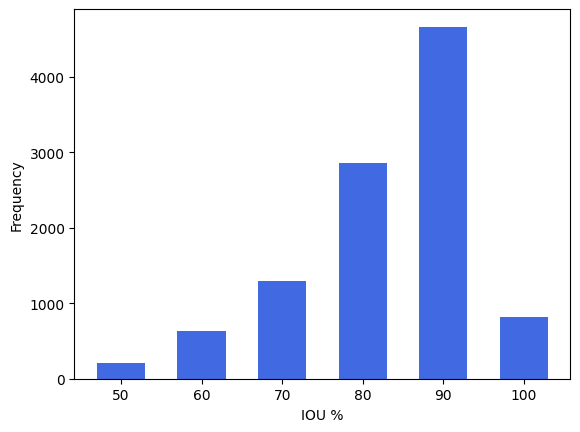

In [ ]:
iou_freq_coco = collections.OrderedDict(sorted(iou_freq_coco.items()))
x = [k*100 for k in iou_freq_coco.keys()]
y = iou_freq_coco.values()

plt.bar(x, y, color='royalblue', width=6)
plt.xlabel('IOU %')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#show results
coco_session.view = high_conf_coco

In [ ]:
print("success")
# successResults11=high_conf_coco.sort_by("eval_fp", reverse=False)[:20]
#successResults1=successResults11.sort_by("eval_tp", reverse=True)[:10]

successResults=high_conf_coco.sort_by("eval_tp", reverse=True)[:10]
coco_session.view = high_conf_coco.sort_by("eval_tp", reverse=True)

success


In [ ]:
def show_results(high_conf, dataName):
  samples_to_show = high_conf

# Display the images with bounding boxes
  fig, axes = plt.subplots(2, 5, figsize=(15, 6))
  for i, sample in enumerate(samples_to_show):
    img = plt.imread(sample.filepath)
    ax = axes[i // 5, i % 5]
    ax.imshow(img)
    ax.axis('off')

    # Get the detections from the sample

    detections = sample.get_field(dataName).detections

    # Draw bounding boxes on the image
    for detection in detections:
        bbox = detection.bounding_box
        x, y, w, h = bbox
        rect = patches.Rectangle(
            (x * img.shape[1], y * img.shape[0]),
            w * img.shape[1],
            h * img.shape[0],
            linewidth=1,
            edgecolor='r',
            facecolor='none'
        )
        ax.add_patch(rect)

  plt.tight_layout()
  plt.show()

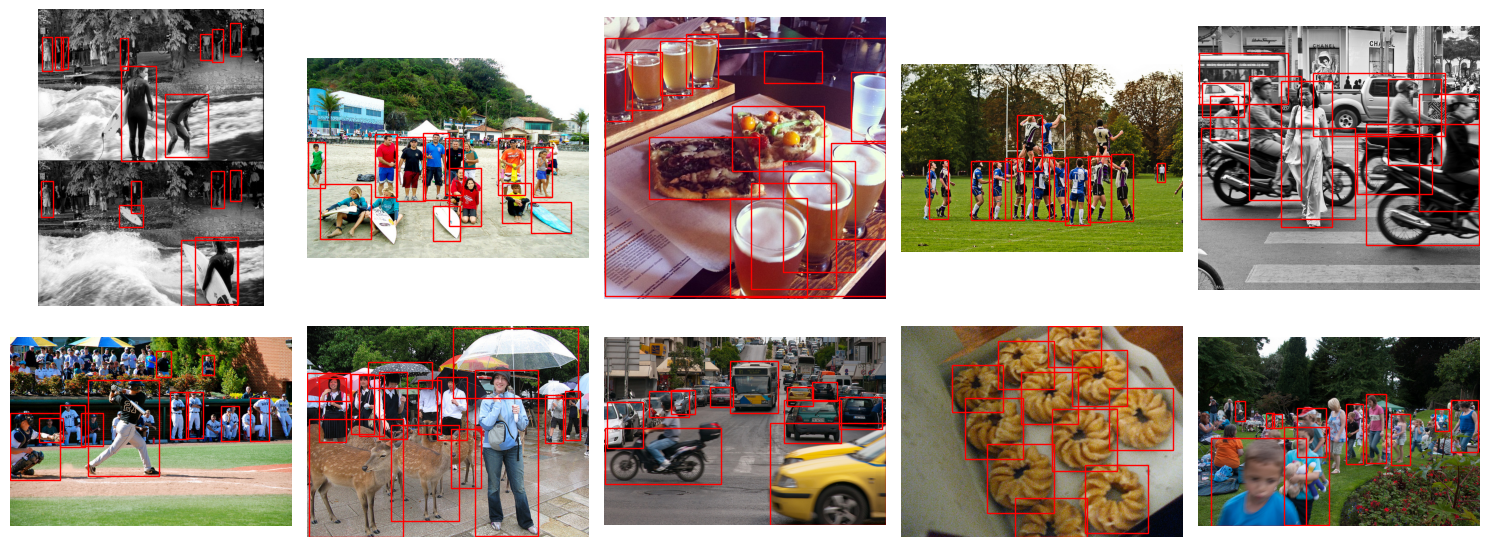

In [ ]:
show_results(successResults, "coco_predictions_of_ssd300_vgg16")

In [ ]:
coco_session.view = successResults

In [ ]:
print("failure")
failureResults = high_conf_coco.sort_by("eval_tp", reverse=False)[:10]
coco_session.view = high_conf_coco.sort_by("eval_tp", reverse=False)

failure


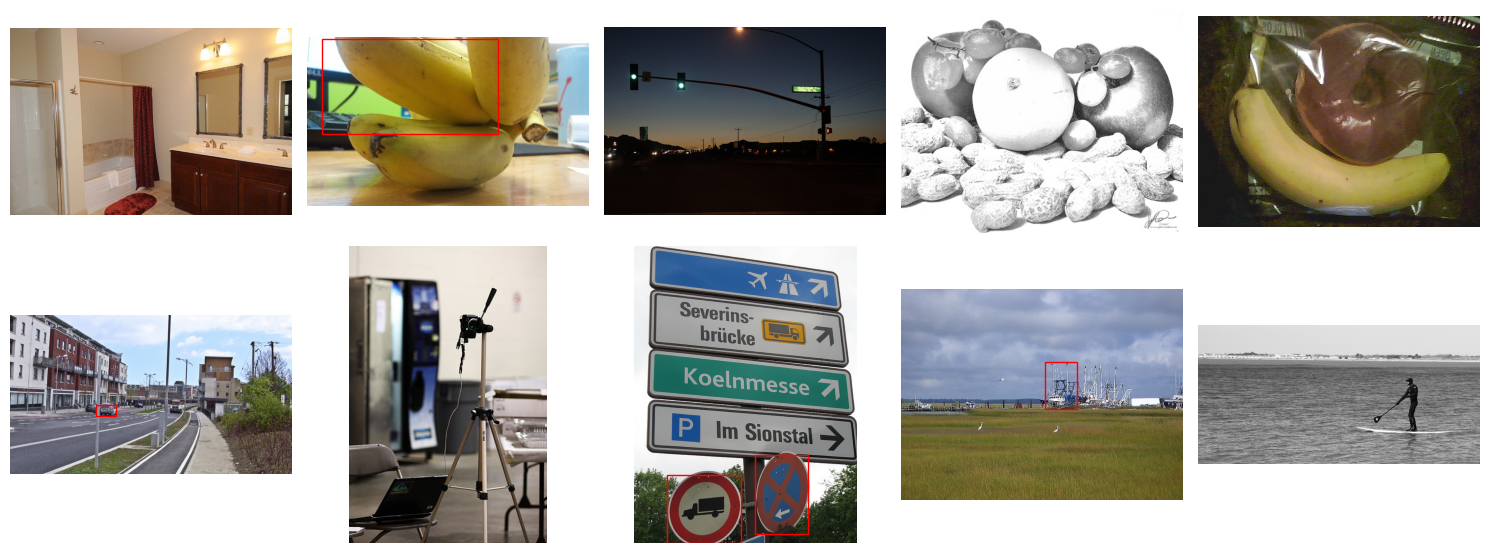

In [ ]:
show_results(failureResults, "coco_predictions_of_ssd300_vgg16")

In [ ]:
coco_session.view = failureResults

**VOC**

In [ ]:
voc_session = fo.launch_app(voc_dataset)

**IOU & Frequency**

In [ ]:
high_conf_voc,results_voc=model_processing(ssd, 'ssd300_vgg16', voc_dataset, coco_dataset.default_classes, voc_nonNumeric_classes, 'voc')

--------------------------------Add predictions --------------------------------
 100% |███████████████| 5823/5823 [21.2m elapsed, 0s remaining, 5.6 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5823/5823 [21.2m elapsed, 0s remaining, 5.6 samples/s]      


Finished predictions for  ssd300_vgg16
------------------- Evaluate Detections-------------------------
Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 5823/5823 [59.8s elapsed, 0s remaining, 90.7 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5823/5823 [59.8s elapsed, 0s remaining, 90.7 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 5823/5823 [40.1s elapsed, 0s remaining, 146.3 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5823/5823 [40.1s elapsed, 0s remaining, 146.3 samples/s]      


------------------------------classes classification report------------------------------
              precision    recall  f1-score   support

   aeroplane       0.00      0.00      0.00       484
     bicycle       0.95      0.60      0.74       380
        bird       0.91      0.54      0.67       629
        boat       0.89      0.30      0.44       491
      bottle       0.91      0.21      0.34       733
         bus       0.93      0.71      0.80       320
         car       0.96      0.45      0.61      1173
         cat       0.90      0.78      0.84       618
       chair       0.84      0.34      0.48      1449
         cow       0.86      0.52      0.65       347
 diningtable       0.00      0.00      0.00       374
         dog       0.88      0.72      0.79       773
       horse       0.93      0.73      0.82       373
   motorbike       0.00      0.00      0.00       376
      person       0.92      0.61      0.73      5110
 pottedplant       0.00      0.00      0.00  

------------------------------ MAP value ------------------------------
0.2724917402822978


In [ ]:
print("------------------------ the most occured classes (top 20) --------------------------- ")
voc_counts = high_conf_voc.count_values("ground_truth.detections.label")
voc_mostOccured_classes = sorted(voc_counts, key=voc_counts.get, reverse=True)[:20]
print_classes_classification_report_and_curves(results_voc, voc_mostOccured_classes)

print("------------------------------classes cnfusion matrix------------------------------")
print_classes_confusionMatrix(results_voc,voc_mostOccured_classes)
# Print some statistics about the total TP/FP/FN counts
print("True +ve: %d" % high_conf_voc.sum("eval_tp"))
print("False +ve: %d" % high_conf_voc.sum("eval_fp"))
print("False -ve: %d" % high_conf_voc.sum("eval_fn"))

------------------------ the most occured classes (top 20) --------------------------- 
              precision    recall  f1-score   support

      person       0.92      0.61      0.73      5110
       chair       0.84      0.34      0.48      1449
         car       0.96      0.45      0.61      1173
         dog       0.88      0.72      0.79       773
      bottle       0.91      0.21      0.34       733
        bird       0.91      0.54      0.67       629
         cat       0.90      0.78      0.84       618
 pottedplant       0.00      0.00      0.00       542
        boat       0.89      0.30      0.44       491
       sheep       0.92      0.53      0.67       485
   aeroplane       0.00      0.00      0.00       484
   tvmonitor       0.00      0.00      0.00       414
        sofa       0.00      0.00      0.00       387
     bicycle       0.95      0.60      0.74       380
   motorbike       0.00      0.00      0.00       376
 diningtable       0.00      0.00      0.00    

------------------------------classes cnfusion matrix------------------------------


/usr/local/lib/python3.10/dist-packages/fiftyone/core/plots/plotly.py:1575: UserWarning:

Interactive plots are currently only supported in Jupyter notebooks. Support outside of notebooks and in Google Colab and Databricks will be included in an upcoming release. In the meantime, you can still use this plot, but note that (i) selecting data will not trigger callbacks, and (ii) you must manually call `plot.show()` to launch a new plot that reflects the current state of an attached session.

See https://docs.voxel51.com/user_guide/plots.html#working-in-notebooks for more information.



True +ve: 7221
False +ve: 702
False -ve: 8566


In [ ]:
iou_freq_voc = collections.defaultdict(int)
for sample in high_conf_voc:
  for detection in sample.voc_predictions_of_ssd300_vgg16.detections:
    if 'eval_iou' in detection:
      iou_freq_voc[np.round(detection.eval_iou, 1)] += 1

for k,v in iou_freq_voc.items():
  print(k, v)

0.9 3555
1.0 685
0.8 1786
0.7 887
0.6 381
0.5 131


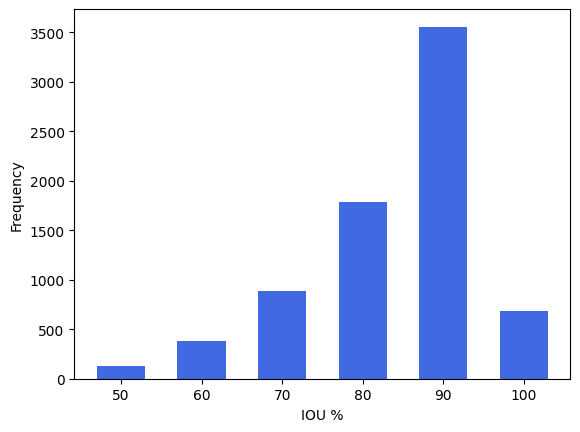

In [ ]:
iou_freq_voc = collections.OrderedDict(sorted(iou_freq_voc.items()))
x = [k*100 for k in iou_freq_voc.keys()]
y = iou_freq_voc.values()

plt.bar(x, y, color='royalblue', width=6)
plt.xlabel('IOU %')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#show results
voc_session.view = high_conf_voc

In [ ]:
print("success")
successResults=high_conf_voc.sort_by("eval_tp", reverse=True)[:10]
voc_session.view = high_conf_voc.sort_by("eval_tp", reverse=True)
voc_session.view=successResults

success


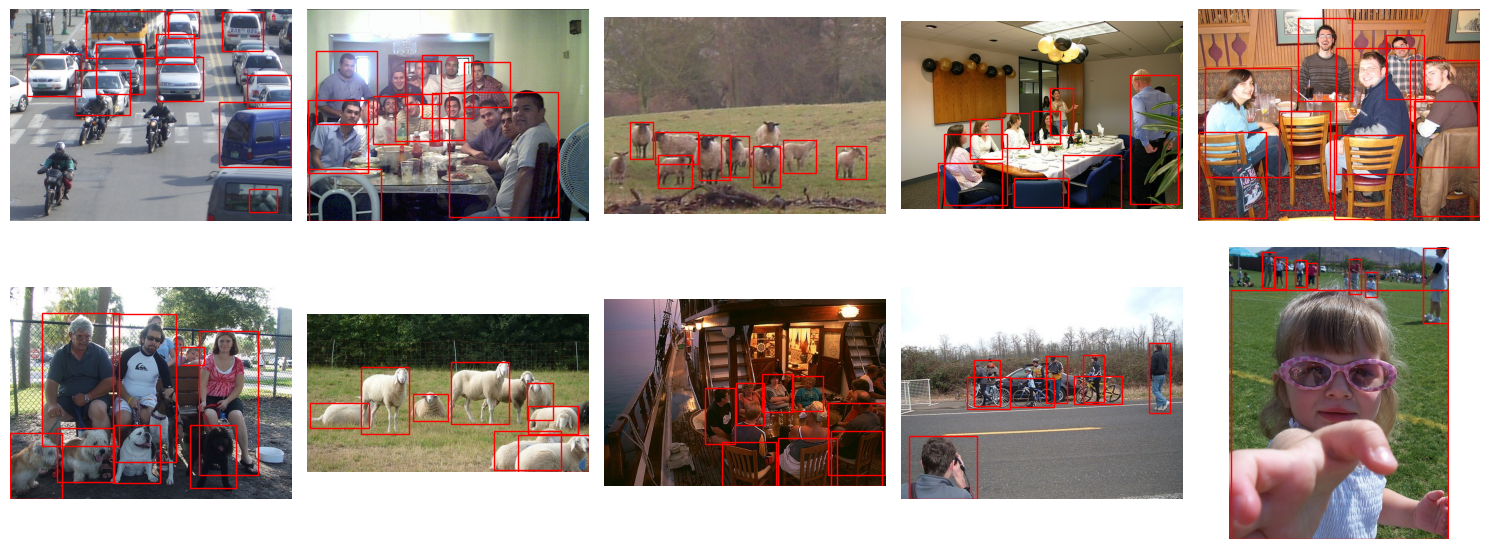

In [ ]:
show_results(successResults,"voc_predictions_of_ssd300_vgg16")

In [ ]:
voc_session.view = successResults

In [ ]:
print("failure")
failureResults_voc = high_conf_voc.sort_by("eval_tp", reverse=False)[:10]
voc_session.view = high_conf_voc.sort_by("eval_tp", reverse=False)


failure


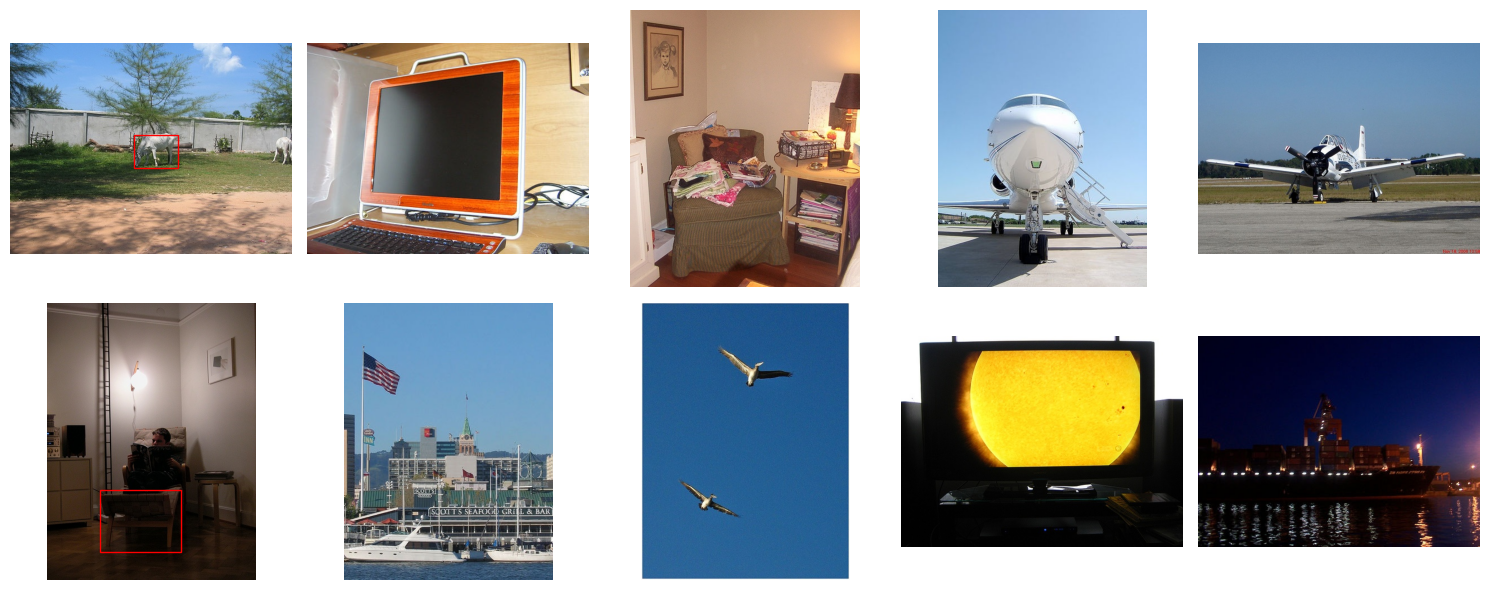

In [ ]:
show_results(failureResults_voc,"voc_predictions_of_ssd300_vgg16")

In [87]:
voc_session.view = failureResults_voc